In [ ]:
# 02. Neural Network classification with PyTorch
Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

## 1. Make classification data and get it ready

sklearn - ML library

pytorch - Deep Learning library

In [ ]:

import sklearn
import torch
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
#checking dataset
print(f"X values: \n {X[:5]}")
print(f"y values: \n {y[:5]}")

X values: 

 [[ 0.75424625  0.23148074]

 [-0.75615888  0.15325888]

 [-0.81539193  0.17328203]

 [-0.39373073  0.69288277]

 [ 0.44220765 -0.89672343]]

y values: 

 [1 1 1 1 0]


In [ ]:

# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


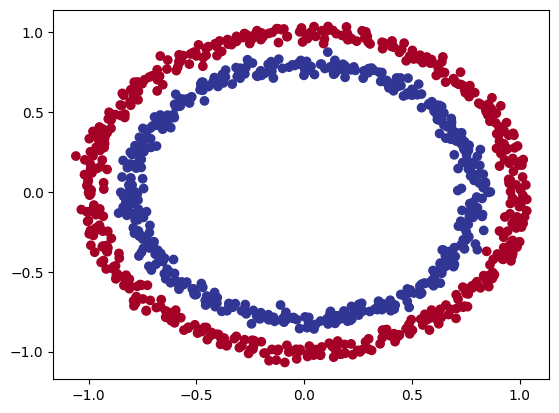

In [ ]:

# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);


Note: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

In [ ]:
circles.shape

(1000, 3)

### 1.1 Check input and output shapes

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
# view the first sample of feature and label
X_sample = X[0]
y_sample = y[0]

print(f"sample from dataset x: {X_sample} and coresponding y value: {y_sample}")
print(f"shape from dataset x: {X_sample.shape} and coresponding y output shape: {y_sample.shape}")


sample from dataset x: [0.75424625 0.23148074] and coresponding y value: 1

shape from dataset x: (2,) and coresponding y output shape: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
type(X)

numpy.ndarray

In [ ]:

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:

# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)

## 2. Building a model
Let's build a model to classify our blue and red dots.

To do so, we want to:

1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclasses nn.Module (almost all models in PyTorch subclass nn.Module)
2. Create 2 nn.Linear() layers that are capable of handling the shapes of our data
3. Defines a forward() method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device

In [ ]:

from sklearn import datasets
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 ->  layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device


device(type='cpu')

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1360,  0.6537],
                      [ 0.3089, -0.4184],
                      [-0.2596, -0.1675],
                      [-0.5696,  0.1909],
                      [ 0.4322, -0.1596]])),
             ('0.bias', tensor([ 0.3403, -0.4237, -0.7042, -0.6706, -0.3024])),
             ('1.weight',
              tensor([[-0.2907, -0.0907,  0.2087, -0.2667,  0.1582]])),
             ('1.bias', tensor([-0.2442]))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])

Length of test samples: 200, Shape: torch.Size([200, 2])



First 10 predictions:

tensor([[-1.],

        [-1.],

        [-0.],

        [-1.],

        [-0.],

        [-0.],

        [-0.],

        [-0.],

        [-0.],

        [-1.]])



First 10 labels:

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer
Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how wrong your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

- For some common choices of loss functions and optimizers
- For the loss function we're going to use torch.nn.BECWithLogitsLoss()
- For different optimizers see torch.optim


In [ ]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [13]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

### 3. Train model
To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)


## 3.1 Going from raw logits -> prediction probabilities -> prediction labels
Our model outputs are going to be raw logits.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our **model's prediction** probabilities to prediction labels by either rounding them or taking the argmax().

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.5373],
        [-0.5718],
        [-0.3071],
        [-0.6031],
        [-0.0853]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3688],
        [0.3608],
        [0.4238],
        [0.3536],
        [0.4787]])

For our prediction probability values, we need to perform a range-style rounding on them:

- y_pred_probs >= 0.5, y=1 (class 1)
- y_pred_probs < 0.5, y=0 (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

## 3.1 Building the training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #                y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71077, Acc: 50.00% | Test loss: 0.70477, Test acc: 50.00%

Epoch: 10 | Loss: 0.70005, Acc: 45.12% | Test loss: 0.69583, Test acc: 46.50%

Epoch: 20 | Loss: 0.69676, Acc: 48.00% | Test loss: 0.69344, Test acc: 49.50%

Epoch: 30 | Loss: 0.69553, Acc: 48.88% | Test loss: 0.69280, Test acc: 50.50%

Epoch: 40 | Loss: 0.69493, Acc: 49.00% | Test loss: 0.69263, Test acc: 51.50%

Epoch: 50 | Loss: 0.69455, Acc: 49.50% | Test loss: 0.69260, Test acc: 50.00%

Epoch: 60 | Loss: 0.69427, Acc: 50.25% | Test loss: 0.69261, Test acc: 50.00%

Epoch: 70 | Loss: 0.69404, Acc: 50.50% | Test loss: 0.69265, Test acc: 50.00%

Epoch: 80 | Loss: 0.69386, Acc: 50.62% | Test loss: 0.69270, Test acc: 49.50%

Epoch: 90 | Loss: 0.69372, Acc: 50.62% | Test loss: 0.69276, Test acc: 49.50%

Epoch: 100 | Loss: 0.69360, Acc: 50.25% | Test loss: 0.69283, Test acc: 49.50%

Epoch: 110 | Loss: 0.69350, Acc: 50.62% | Test loss: 0.69290, Test acc: 49.00%

Epoch: 120 | Loss: 0.69341, Acc: 50.62% | Test loss

### 4. Make predictions and evaluate the model
From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called plot_decision_boundary() - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [24]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

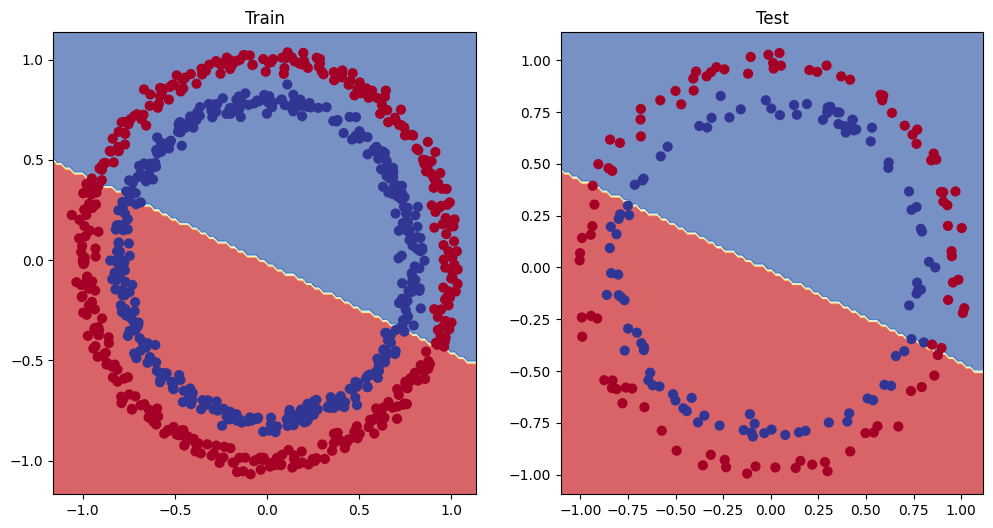

In [ ]:

# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5.Improving a model (from a model perspective)
- Add more layers - give the model more chances to learn about patterns in the data
- Add more hidden units - go from 5 hidden units to 10 hidden units
Fit for longer
- Changing the activation functions
- Change the learning rate
- Change the loss function
- These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as hyperparameters.

Let's try and improve our model by:

- Adding more hidden units: 5 -> 10
- Increase the number of layers: 2 -> 3
- Increase the number of epochs: 100 -> 1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1= CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:

# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%

Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%

Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%

Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%

Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%

Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%

Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%

Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%

Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%

Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


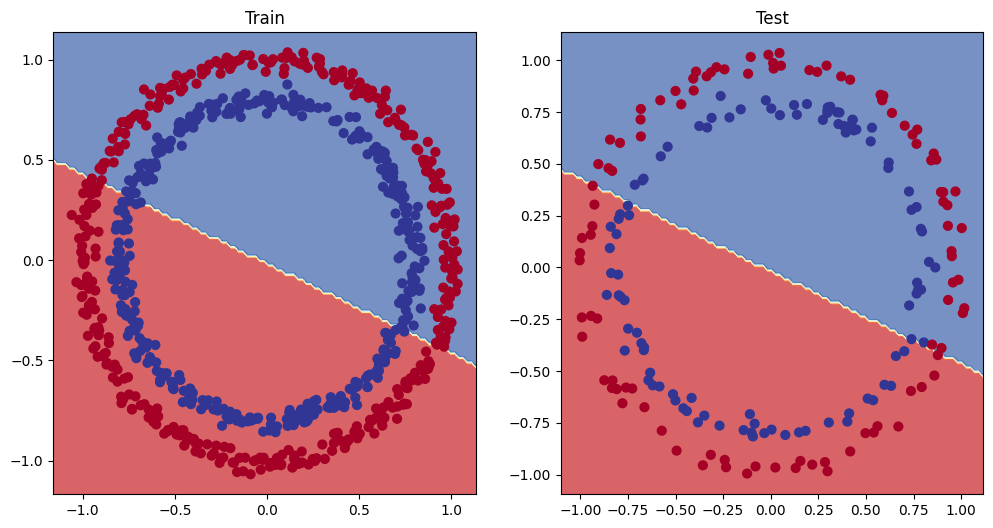

In [ ]:

# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 5.1 Preparing data to see if our model can fit a straight line
One way to troubleshoot to a larger problem is to test out a smaller problem.

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

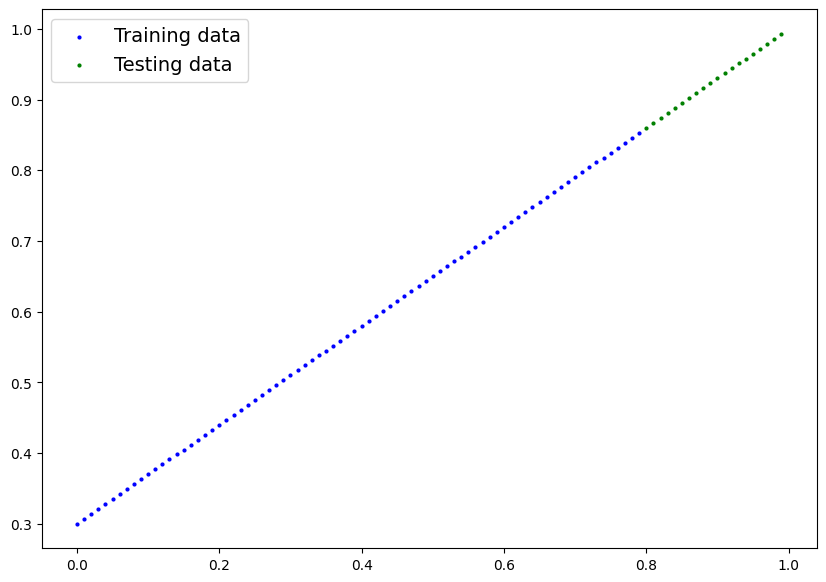

In [ ]:

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);


### 5.1 Adjusting model_1 to fit the straight line

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss and optimizer
loss_fn= nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)


In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_pred = model_2(X_train_regression)

  # 2. Calculate the loss/acc
  loss = loss_fn(y_pred, y_train_regression)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_2(X_test_regression)
    # 2. Calculate loss
    test_loss = loss_fn(test_pred,
                        y_test_regression)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f},| Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986,| Test loss: 0.91103

Epoch: 100 | Loss: 0.02858,| Test loss: 0.00081

Epoch: 200 | Loss: 0.02533,| Test loss: 0.00209

Epoch: 300 | Loss: 0.02137,| Test loss: 0.00305

Epoch: 400 | Loss: 0.01964,| Test loss: 0.00341

Epoch: 500 | Loss: 0.01940,| Test loss: 0.00387

Epoch: 600 | Loss: 0.01903,| Test loss: 0.00379

Epoch: 700 | Loss: 0.01878,| Test loss: 0.00381

Epoch: 800 | Loss: 0.01840,| Test loss: 0.00329

Epoch: 900 | Loss: 0.01798,| Test loss: 0.00360


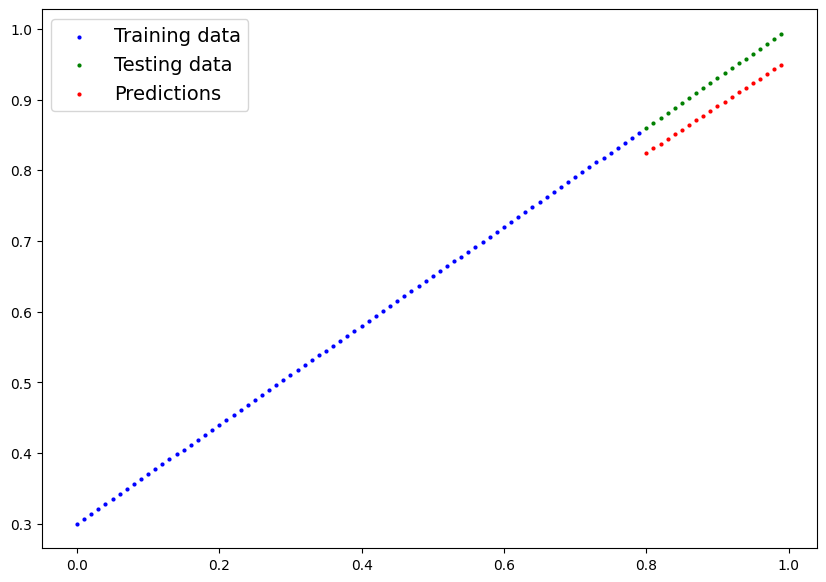

In [ ]:

model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data= X_test_regression,
                 test_labels=y_test_regression,
                 predictions = y_preds)

## 6. The missing piece: non-linearity
"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

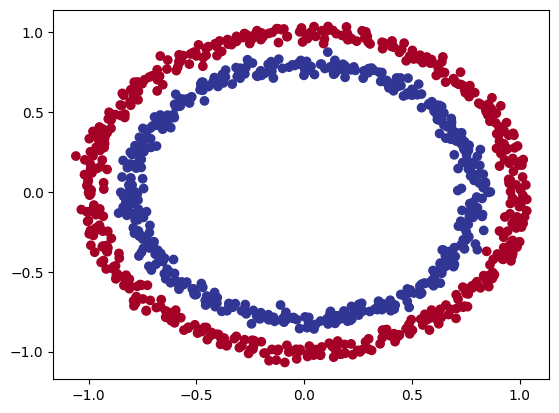

In [ ]:

# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# convert data into tensors and then to train test split
import torch
from sklearn.model_selection import train_test_split

# turn data into tensors
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

# split data into train test split
X_train,X_test,y_train,y_test= train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=42)

len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

In [ ]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linear

In [ ]:
# building a model with non-linear activation function
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# creating a loss and optimizer function
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params= model_3.parameters(), lr=0.1)

### 6.3 Training a model with non-linearity

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's this happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.0304, Acc: 99.88% | Test Loss: 0.0387, Test Acc: 100.00%

Epoch: 100 | Loss: 0.0255, Acc: 99.88% | Test Loss: 0.0411, Test Acc: 100.00%

Epoch: 200 | Loss: 0.0230, Acc: 99.88% | Test Loss: 0.0395, Test Acc: 100.00%

Epoch: 300 | Loss: 0.0211, Acc: 100.00% | Test Loss: 0.0375, Test Acc: 100.00%

Epoch: 400 | Loss: 0.0195, Acc: 100.00% | Test Loss: 0.0356, Test Acc: 100.00%

Epoch: 500 | Loss: 0.0182, Acc: 100.00% | Test Loss: 0.0337, Test Acc: 100.00%

Epoch: 600 | Loss: 0.0170, Acc: 100.00% | Test Loss: 0.0321, Test Acc: 100.00%

Epoch: 700 | Loss: 0.0160, Acc: 100.00% | Test Loss: 0.0306, Test Acc: 99.50%

Epoch: 800 | Loss: 0.0151, Acc: 100.00% | Test Loss: 0.0292, Test Acc: 99.50%

Epoch: 900 | Loss: 0.0143, Acc: 100.00% | Test Loss: 0.0281, Test Acc: 99.50%


### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

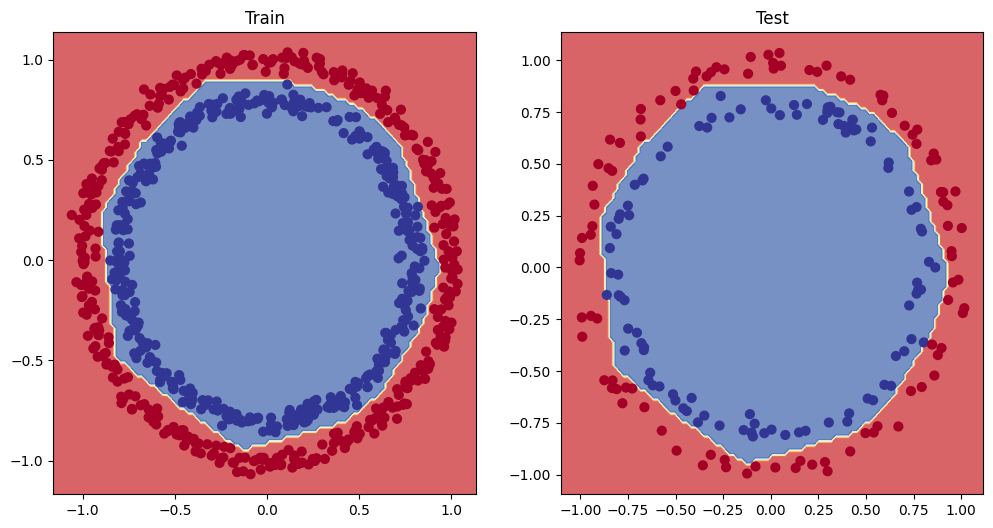

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

##7. Replicating non-linear activation functions
Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.

In [ ]:

A = torch.arange(-10,10,1, dtype= torch.float)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

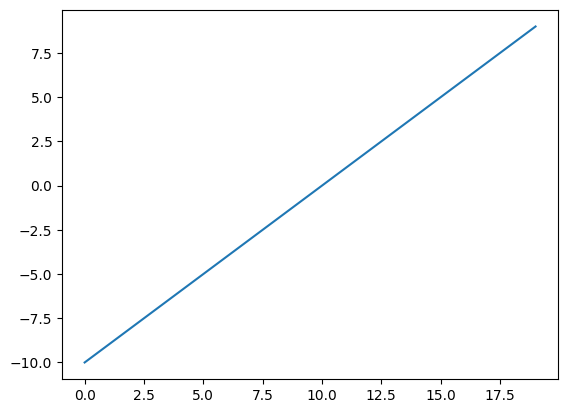

In [ ]:
# visualize our data
plt.plot(A)

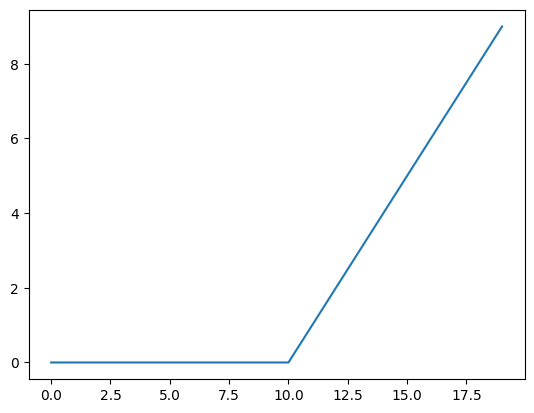

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x:torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

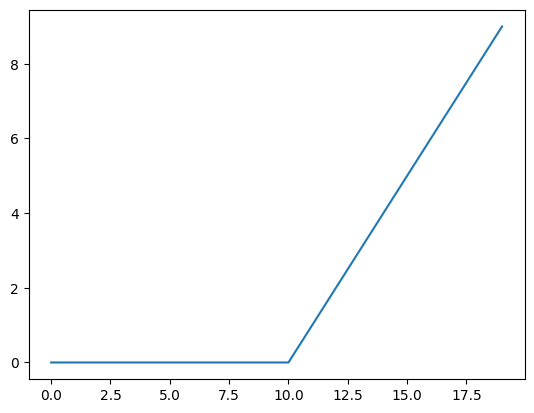

In [ ]:
# plot relu activation function that we created
plt.plot(relu(A))

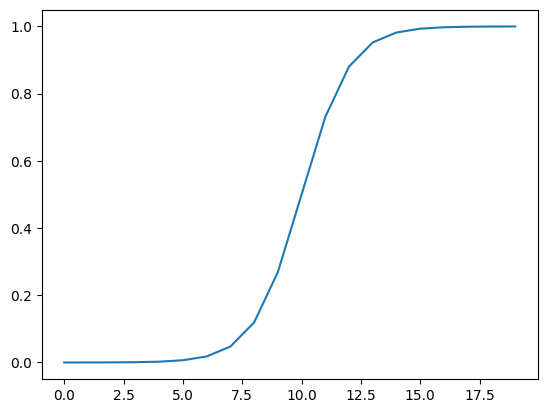

In [ ]:
# lets do the same for sigmoid
# custom sigmoid
def sigmoid(x):
  return 1/(1+torch.exp(-x))

plt.plot(sigmoid(A))

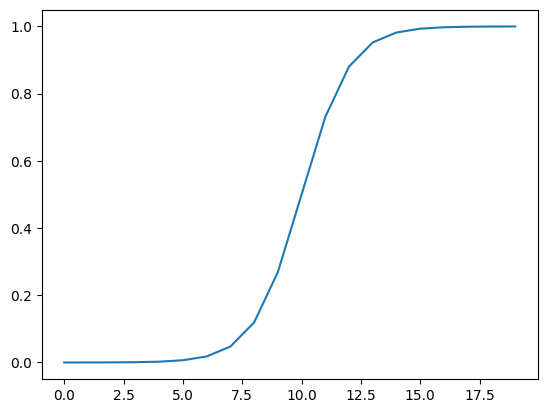

In [ ]:
plt.plot(torch.sigmoid(A))

## 8. Putting all together with a multi-class classification

### 8.1 Creating a tory multi-class dataset

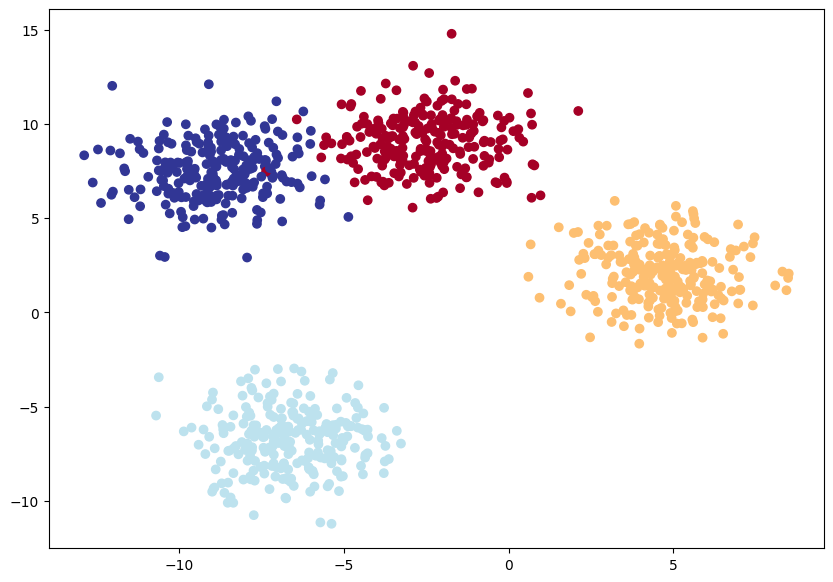

In [2]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn

# set the hyperparameter
NUM_SAMPLES=1000
NUM_CLASSES=4
NUM_FEATURES = 2
RANDOM_SEED=42

# 1. create a multiclass data
X_blob, y_blob = make_blobs(n_samples= NUM_SAMPLES,
                           n_features = NUM_FEATURES,
                           centers = NUM_CLASSES,
                           cluster_std = 1.5,
                           random_state= RANDOM_SEED)

# 2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state= RANDOM_SEED)
len(X_blob_train), len(X_blob_test), len(y_blob_train), len(y_blob_test)

# 4. Plot data
plt.figure(figsize= (10,7))
plt.scatter(X_blob[:,0],X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Builidng a multi-class classification model in pytorch

In [3]:
# create a device agnostic code 
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
# build a multiclass classification model
class BlobModel(nn.Module):
    def __init__(self, in_features, out_features, hidden_units=8):
        
        """Initializes multi-class classification model.
    
        Args:
          input_features (int): Number of input features to the model
          output_features (int): Number of outputs features (number of output classes)
          hidden_units (int): Number of hidden units between layers, default 8

        Returns:

        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=in_features,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=out_features)
        )
    def forward(self,x):
        return self.linear_layer_stack(x)
model_4 = BlobModel(in_features=2,out_features=4,hidden_units=8).to(device)
model_4
    
    

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Creating a loss function and optimizer for multiclass classification model

In [5]:
# Create a loss function for multi-class classification - loss function measures how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(), 
                            lr=0.1) # learning rate is a hyperparameter you can change
     

 ### 8.4 Getting prediction probabilites for multiclass pytorch model
 
 in order to evaluate and train and test our model, we need to convert our models output (logits) to prediction probabilities and then to prediction labels.
 
Logits (raw output of the model) -> Pred probs (use torch.softmax) -> Pred labels (take the argmax of the prediction probabilities)

In [6]:
# lets get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[ 0.4062,  0.7445,  0.7438, -0.0895],
        [ 0.3006,  0.1641,  0.3240,  0.0098],
        [-0.2039,  1.3360,  1.4436, -1.0219],
        [ 0.3598,  0.5583,  0.6102, -0.0664],
        [ 0.3446,  0.3449,  0.6121,  0.0117],
        [ 0.2979,  0.1619,  0.3226,  0.0084],
        [-0.1799,  1.3582,  1.3653, -1.0222],
        [ 0.3312,  0.2531,  0.4828,  0.0226],
        [-0.2718,  1.4127,  1.6381, -1.1058],
        [ 0.3319,  0.2696,  0.5208,  0.0208]], device='cuda:0')

In [7]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [8]:
# converting model output logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.4062,  0.7445,  0.7438, -0.0895],
        [ 0.3006,  0.1641,  0.3240,  0.0098],
        [-0.2039,  1.3360,  1.4436, -1.0219],
        [ 0.3598,  0.5583,  0.6102, -0.0664],
        [ 0.3446,  0.3449,  0.6121,  0.0117]], device='cuda:0')
tensor([[0.2266, 0.3178, 0.3176, 0.1380],
        [0.2744, 0.2394, 0.2809, 0.2052],
        [0.0885, 0.4128, 0.4597, 0.0391],
        [0.2406, 0.2934, 0.3090, 0.1571],
        [0.2485, 0.2486, 0.3247, 0.1782]], device='cuda:0')


In [9]:
# convert our models prediction probabilites to prediction labels
y_preds= torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
        2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
        2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
        1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2,
        2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 2, 2, 2, 2, 1, 2, 1], device='cuda:0')

In [10]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 create a training loop and testing loop for multi class pytorch model

In [11]:
y_blob_train.dtype, y_blob_test.dtype, y_logits.dtype

(torch.int64, torch.int64, torch.float32)

In [14]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs 
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
    
    ### Training 
    model_4.train()

    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                               y_pred=test_preds)
    
    # Print out what's happenin'
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.2176, Acc: 36.38% | Test loss: 1.1104, Test acc: 48.00%
Epoch: 10 | Loss: 0.6891, Acc: 75.62% | Test loss: 0.6633, Test acc: 78.00%
Epoch: 20 | Loss: 0.2610, Acc: 99.12% | Test loss: 0.2370, Test acc: 99.50%
Epoch: 30 | Loss: 0.1131, Acc: 99.00% | Test loss: 0.1009, Test acc: 99.50%
Epoch: 40 | Loss: 0.0734, Acc: 99.25% | Test loss: 0.0636, Test acc: 99.50%
Epoch: 50 | Loss: 0.0571, Acc: 99.25% | Test loss: 0.0480, Test acc: 99.50%
Epoch: 60 | Loss: 0.0484, Acc: 99.25% | Test loss: 0.0395, Test acc: 99.50%
Epoch: 70 | Loss: 0.0429, Acc: 99.25% | Test loss: 0.0342, Test acc: 99.50%
Epoch: 80 | Loss: 0.0393, Acc: 99.25% | Test loss: 0.0305, Test acc: 99.50%
Epoch: 90 | Loss: 0.0367, Acc: 99.25% | Test loss: 0.0278, Test acc: 99.50%


### 8.6 making and evaluating predictions with a pytorch multi-class model


In [15]:
# making predictions
model_4.eval()
with torch.inference_mode():
    y_logits= model_4(X_blob_test)
y_logits[:10]

tensor([[ 2.5472e+00,  8.1690e+00, -2.4465e+00, -7.1413e+00],
        [ 2.6915e+00, -8.2147e+00, -1.1343e+00,  7.4592e+00],
        [-4.6809e+00, -1.2501e-01,  7.2191e+00, -5.9874e-01],
        [ 8.4869e-01,  5.2794e+00, -7.9173e-01, -4.7746e+00],
        [ 6.6166e+00,  2.2209e+00, -5.7960e+00, -2.0307e+00],
        [ 2.9315e+00, -9.7655e+00, -1.2072e+00,  8.7919e+00],
        [-4.2278e+00,  3.9807e-01,  6.7385e+00, -9.3976e-01],
        [ 6.0036e+00,  4.3776e-02, -4.9322e+00,  5.0271e-03],
        [-5.6804e+00, -8.1375e-01,  8.4309e+00, -2.1939e-01],
        [ 6.1647e+00,  4.7361e-01, -5.2164e+00, -4.3678e-01]], device='cuda:0')

In [16]:
# go from logits -> prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[3.6050e-03, 9.9637e-01, 2.4445e-05, 2.2348e-07],
        [8.4266e-03, 1.5458e-07, 1.8370e-04, 9.9139e-01],
        [6.7833e-06, 6.4572e-04, 9.9895e-01, 4.0207e-04],
        [1.1738e-02, 9.8594e-01, 2.2761e-03, 4.2406e-05],
        [9.8765e-01, 1.2177e-02, 4.0167e-06, 1.7342e-04],
        [2.8418e-03, 8.6967e-09, 4.5310e-05, 9.9711e-01],
        [1.7236e-05, 1.7596e-03, 9.9776e-01, 4.6174e-04],
        [9.9495e-01, 2.5674e-03, 1.7719e-05, 2.4698e-03],
        [7.4379e-07, 9.6604e-05, 9.9973e-01, 1.7503e-04],
        [9.9528e-01, 3.3600e-03, 1.1356e-05, 1.3519e-03]], device='cuda:0')

In [17]:
# go from pred probs to pred labels
y_preds = y_pred_probs.argmax(dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [18]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

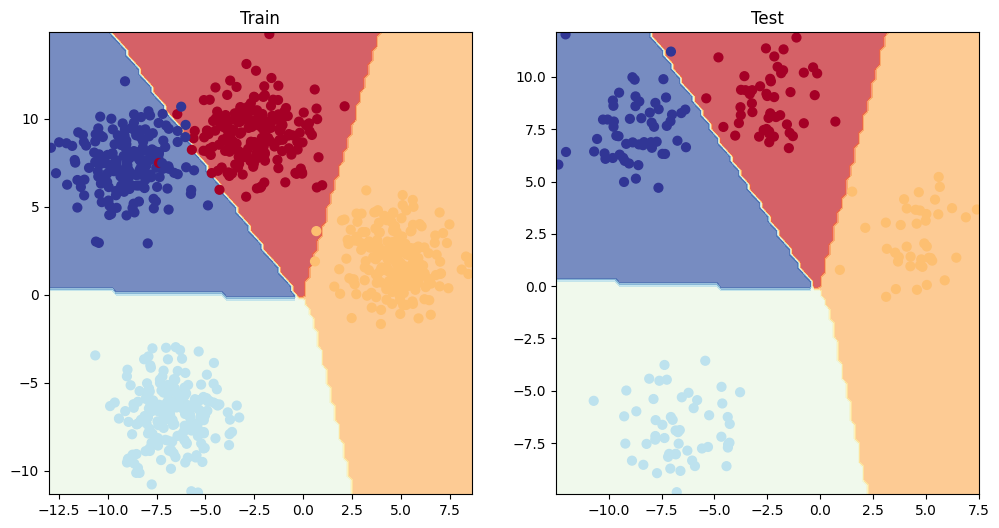

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)
- Accuracy - out of 100 samples, how many does our model get right?
- Precision
- Recall
- F1-score
- Confusion matrix
- Classification report
See this article for when to use precision/recall - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

If you want access to a lot of PyTorch metrics, see TorchMetrics - https://torchmetrics.readthedocs.io/en/latest/

In [26]:
!pip install torchmetrics

In [28]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task='multiclass',                                           
                                     num_classes=NUM_CLASSES).to(device)

# Calculuate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')